## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [68]:
import numpy as np
import pandas as pd
import psycopg2
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use('seaborn')
matplotlib.rc("font", size=18) 

In [69]:
from contextlib import closing
pg_connection =   {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "db_ds_students",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
sql_str = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'public';"
with closing(psycopg2.connect(**pg_connection)) as conn:
    with conn.cursor() as cursor:
        cursor.execute(sql_str)
        tables_data = [a for a in cursor.fetchall()]
        df = pd.read_sql_query('SELECT * FROM exploratory', conn)
for table in tables_data:
    print(table)

('keywords',)
('links',)
('ratings',)
('exploratory',)
('new_table',)
('course_purchases',)
('users',)
('joi',)
('studentt',)


In [72]:
for col in df.columns:
    df[col] = df[col].astype('float')

In [74]:
df.head(20)

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.439930,-2.180961,33.468496,-1.927388,-5.321392
1,1.770580,-1.174880,0.989593,-1.139681,-2.080220
2,0.742817,-0.263483,0.168149,-0.332438,-0.195720
3,-1.510892,2.712571,-2.685643,2.058495,-4.098402
4,-0.483511,0.096511,-0.028703,0.168763,-0.046664
5,-0.820768,-2.052829,39.745741,-1.121248,1.684896
6,1.189308,0.291490,-0.498852,-0.079237,0.346671
7,-1.109471,-0.640932,0.862682,-0.160428,0.711095
8,-1.065875,1.123135,-1.043496,0.950182,-1.197121
9,0.600877,-1.074064,1.062993,-0.815662,-0.645380


Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше. 

In [73]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.065085,0.037519,3.958900,0.038294,-0.602373
std,1.248609,1.419701,13.300371,1.030048,1.658605
min,-3.042490,-3.593248,-2.725758,-2.566864,-5.325568
25%,-1.076774,-1.099268,-1.214747,-0.778637,-1.652154
50%,0.171540,0.000149,-0.046936,0.000794,-0.251712
75%,0.878959,1.186975,1.089343,0.886191,0.707675
max,2.439930,2.712571,62.381761,2.086148,1.902054


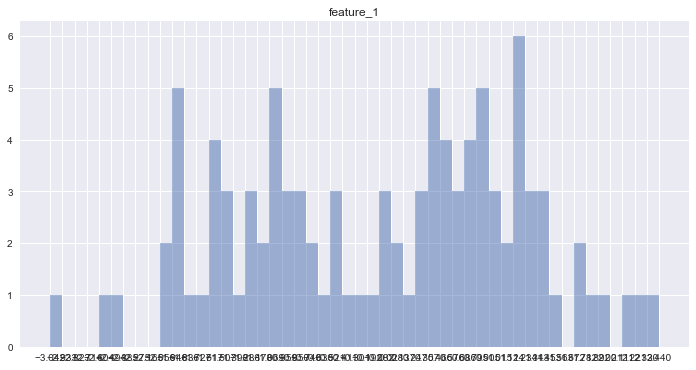

In [98]:
data = df['feature_1']
fig, ax = plt.subplots(figsize = (12,6))
_,bins,_= ax.hist(data, label = 'feature_1', alpha = 0.5, bins=50)
ax.set_xticks(bins)
ax.set_title('feature_1')
plt.show()

от нуля до 3 расположено примерно треть всех значений, сосредоточено больше значений до 1, есть пропуски, и выбросы на 5 и 6

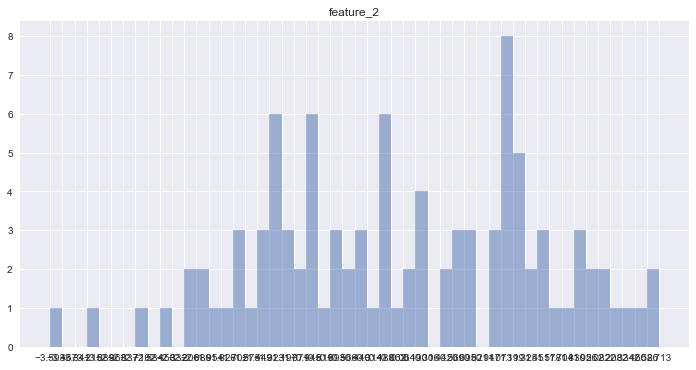

In [99]:
data = df['feature_2']
fig, ax = plt.subplots(figsize = (12,6))
_,bins,_= ax.hist(data, label = 'feature_2', alpha = 0.5, bins=50)
ax.set_xticks(bins)
ax.set_title('feature_2')
plt.show()

от нуля до 3 расположено примерно треть всех значений, сосредоточено больше значений до 1, есть пропуски, и выбросы на 6 и 8

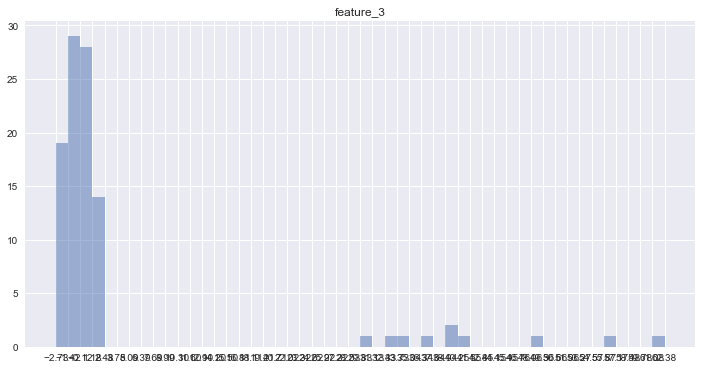

In [100]:
data = df['feature_3']
fig, ax = plt.subplots(figsize = (12,6))
_,bins,_= ax.hist(data, label = 'feature_3', alpha = 0.5, bins=50)
ax.set_xticks(bins)
ax.set_title('feature_3')
plt.show()

от нуля до 19 расположено примерно четверть всех значений, сосредоточено больше значений до 14, много пропусков

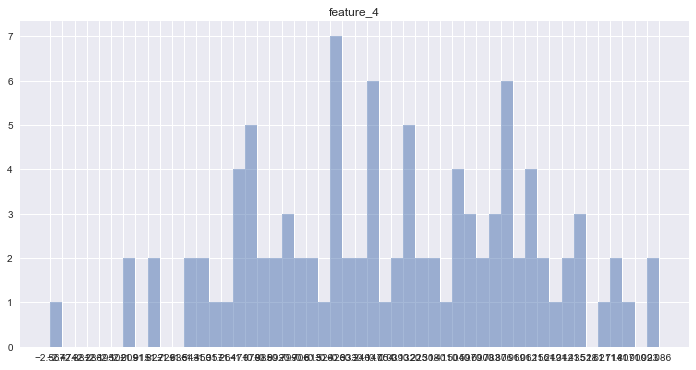

In [101]:
data = df['feature_4']
fig, ax = plt.subplots(figsize = (12,6))
_,bins,_= ax.hist(data, label = 'feature_4', alpha = 0.5, bins=50)
ax.set_xticks(bins)
ax.set_title('feature_4')
plt.show()

от нуля до 3 расположено примерно треть всех значений, сосредоточено больше значений до 2, есть пропускиб выбросы на 6 и 7

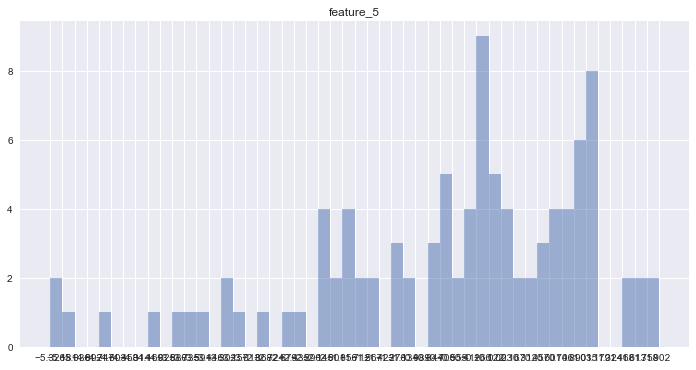

In [102]:
data = df['feature_5']
fig, ax = plt.subplots(figsize = (12,6))
_,bins,_= ax.hist(data, label = 'feature_5', alpha = 0.5, bins=50)
ax.set_xticks(bins)
ax.set_title('feature_5')
plt.show()

от нуля до 2 расположено примерно четверть всех значений, сосредоточено больше значений до 2, есть пропуски, выбросы 9 и 8

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

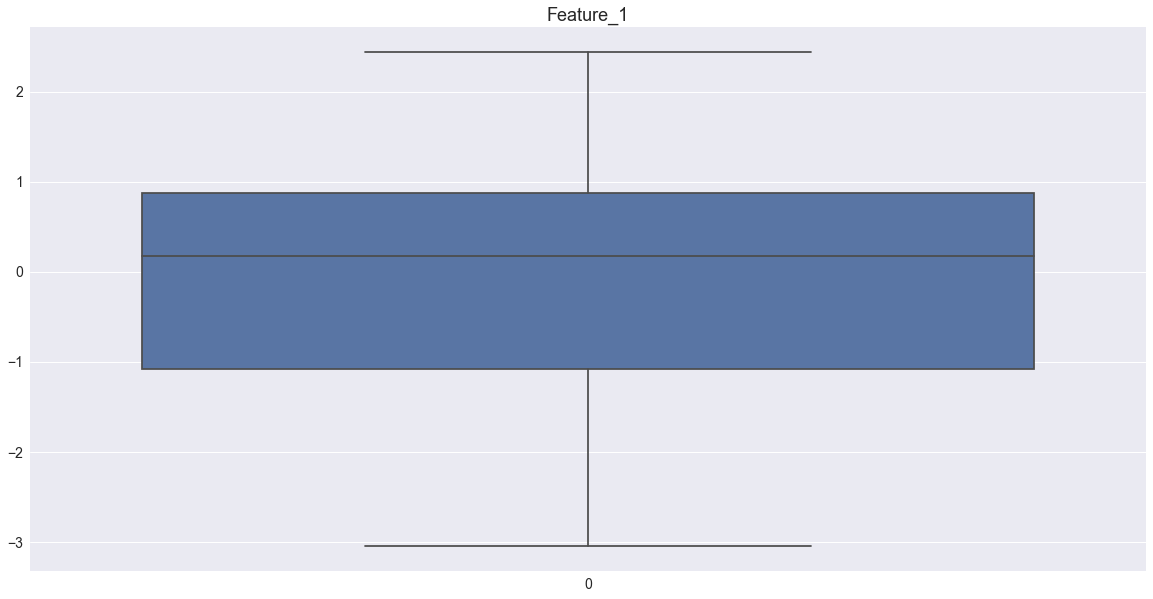

In [119]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Feature_1", fontsize=18)
plt.xticks(np.arange(min(df['feature_5']-1), max(df['feature_3']+1)))
plt.tick_params(labelsize=14)

sns.boxplot(data=df['feature_1']).set(ylabel=None, xlabel=None)
plt.show()

Нормальное распределение от -3 до 2. Выбросы отсутствуют.

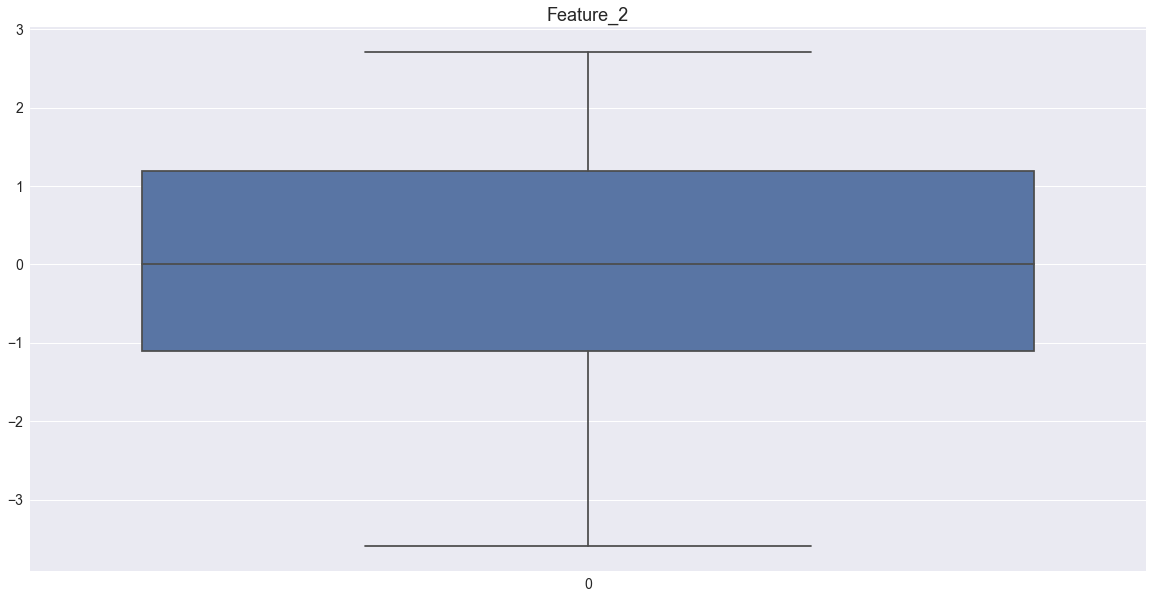

In [118]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Feature_2", fontsize=18)
plt.xticks(np.arange(min(df['feature_5']-1), max(df['feature_3']+1)))
plt.tick_params(labelsize=14)

sns.boxplot(data=df['feature_2']).set(ylabel=None, xlabel=None)
plt.show()

Нормальное распределение от -3 до 3. Выбросы отсутствуют.

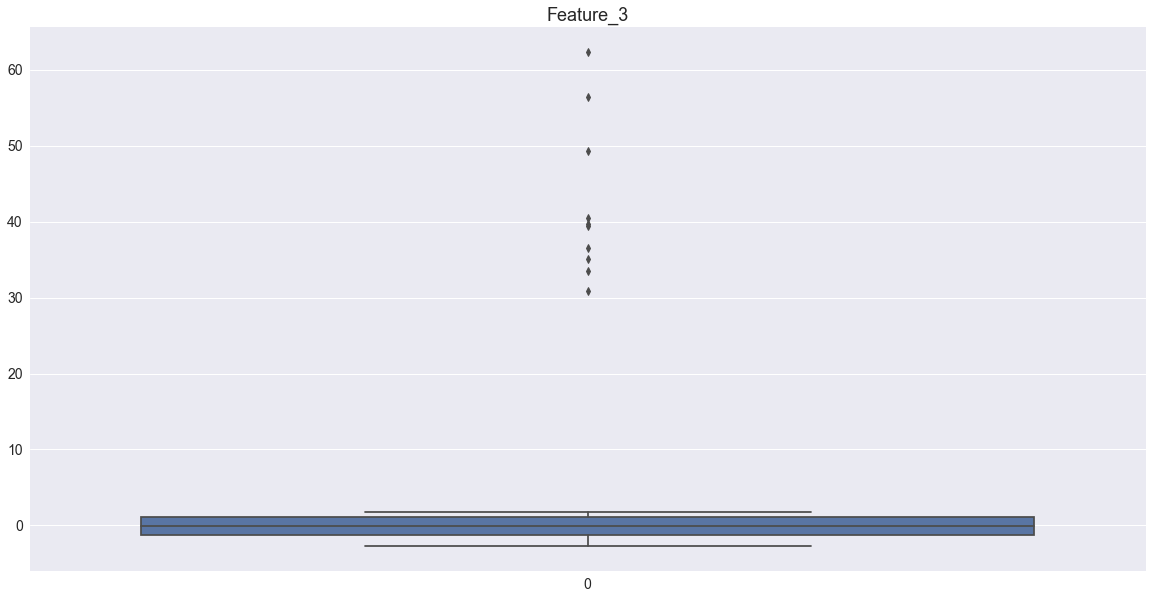

In [120]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Feature_3", fontsize=18)
plt.xticks(np.arange(min(df['feature_5']-1), max(df['feature_3']+1)))
plt.tick_params(labelsize=14)

sns.boxplot(data=df['feature_3']).set(ylabel=None, xlabel=None)
plt.show()

Нормальное распределение от -3 до 2. Выбросы присутсвуют после 30.

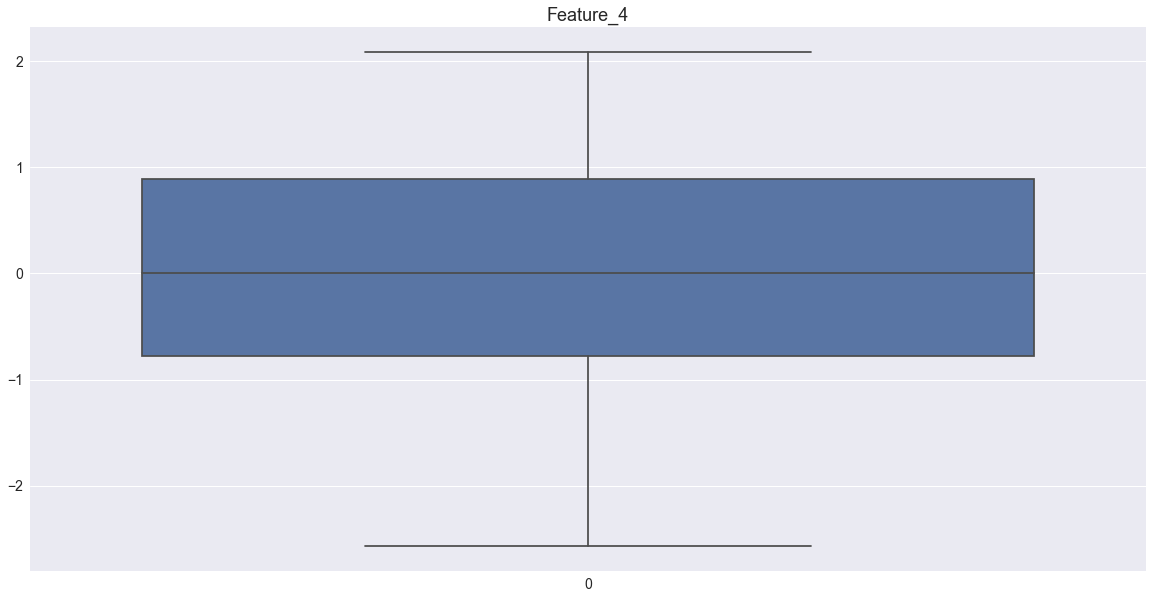

In [121]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Feature_4", fontsize=18)
plt.xticks(np.arange(min(df['feature_5']-1), max(df['feature_3']+1)))
plt.tick_params(labelsize=14)

sns.boxplot(data=df['feature_4']).set(ylabel=None, xlabel=None)
plt.show()

Нормальное распределение от -3 до 2. Выбросы отсутствуют.

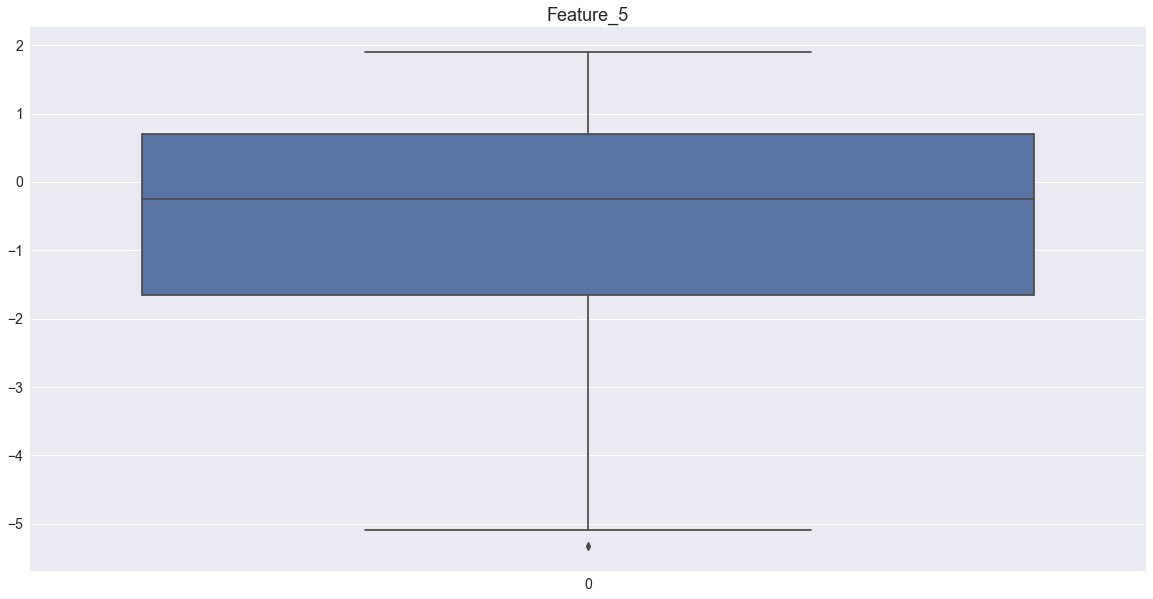

In [122]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Feature_5", fontsize=18)
plt.xticks(np.arange(min(df['feature_5']-1), max(df['feature_3']+1)))
plt.tick_params(labelsize=14)

sns.boxplot(data=df['feature_5']).set(ylabel=None, xlabel=None)
plt.show()

Нормальное распределение от -5 до 2. Выбросы присутствуют после -5.

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

Text(0, 0.5, 'feature_4')

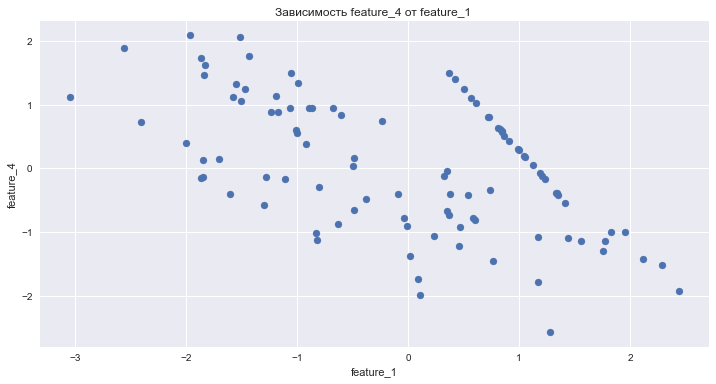

In [127]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.scatter(df['feature_1'], df['feature_4'])
ax.set_title('Зависимость feature_4 от feature_1 ')
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_4')

In [ ]:
при увеличение feature_1 значение feature_4 падает. Можно включить в модель регрессии

Text(0, 0.5, 'feature_4')

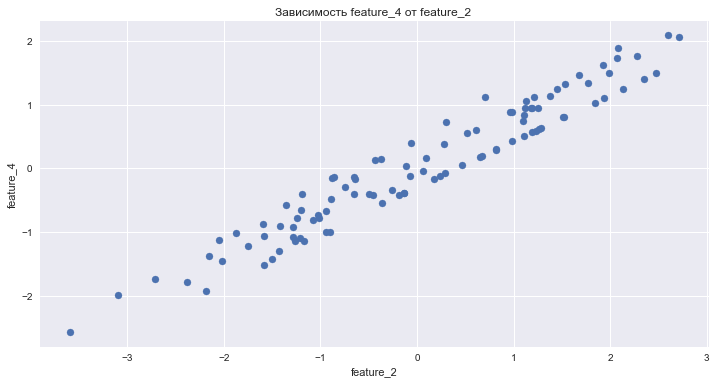

In [128]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.scatter(df['feature_2'], df['feature_4'])
ax.set_title('Зависимость feature_4 от feature_2 ')
ax.set_xlabel('feature_2')
ax.set_ylabel('feature_4')

In [ ]:
при увеличение feature_2 значение feature_4 расте, наблюдается линейная зависимость. Можно включить в модель регрессии

Text(0, 0.5, 'feature_4')

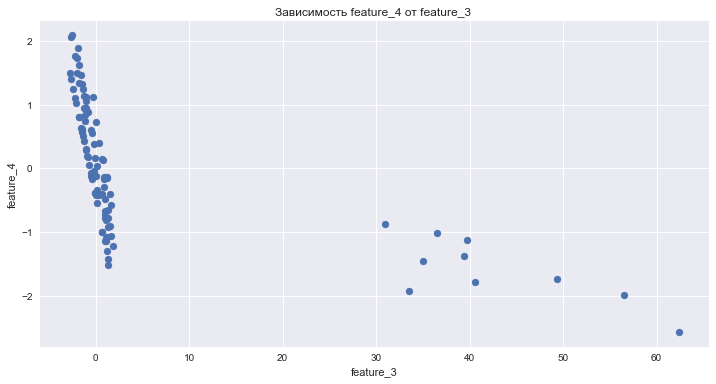

In [129]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.scatter(df['feature_3'], df['feature_4'])
ax.set_title('Зависимость feature_4 от feature_3 ')
ax.set_xlabel('feature_3')
ax.set_ylabel('feature_4')

In [ ]:
при увеличение feature_3 значение feature_4 расте. Есть выбросы. Включять в модель регрессии не следует.

Text(0, 0.5, 'feature_4')

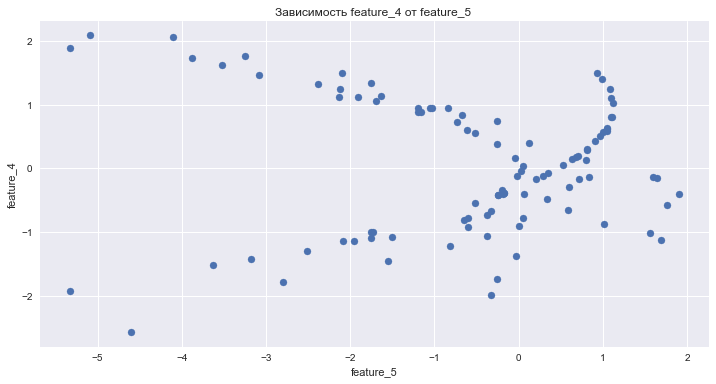

In [130]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.scatter(df['feature_5'], df['feature_4'])
ax.set_title('Зависимость feature_4 от feature_5 ')
ax.set_xlabel('feature_5')
ax.set_ylabel('feature_4')

In [ ]:
при увеличение feature_5 значение feature_4 падает, ведет себя хаотически. Включать в модель регрессии лучше не следует.